In [1]:
# 핑크색 warning 안내문 방지 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 워드크라우드에 사용할 라이브러리를 불러옵니다
import pandas as pd
import numpy as np
import re

In [3]:
pd.read_csv('tweets_2020.csv', encoding = 'utf-8')

,0
0,대치동맛집\n블랙푸들\n강아지\n귀요미\n멍\n건강검진\n선팔하면맞팔\n포메라이언\...
1,동네에 애견동반가능카페이따..!
2,간판에 애견동반 식당이라고 적혀있어서 우리 댕댕이가 여기 갔나보네ㅎㅎㅎ https:...
3,평창에서 우리 보리를 데려온지 오늘로 365일.\n꼭 다시 가보고 싶었습니다.\n\...
4,실낙원 애견 동반도 되나.. 멈멈
...,...
868,암튼 그러고 우리 시간이 너무 이른 시간이라 와인 까러 출발~! 애견 동반 카페라서...
869,아니면 제주도 게하 중에서 애견동반 가능한 게하 잌ㅅ는데 거기 가서 강아지 힐링 하기 ㅎ
870,애견카페 및 애견동반 바베큐 인터넷으로 검색해서 갔던 견생역전! 김포라 거리가 좀...
871,어제 티라노랑 보스 데리고 애견동반카페 다녀왔다. 근데 참 이게 무슨 우연인지 티라...


# wordcloud 세팅

In [4]:
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor

In [5]:
# 말뭉치(corpus)는 자연어 분석 작업을 위해 만든 샘플 문서 집합을 말한다.
corpus = DoublespaceLineCorpus('tweets_2020.csv')
len(corpus)

2277

In [6]:
word_extractor = WordExtractor()
word_extractor.train(corpus)

training was done. used memory 0.135 Gb


In [7]:
corpus = DoublespaceLineCorpus('tweets_2020.csv', iter_sent = True)
len(corpus)

2217

In [8]:
# 잘 변환 되었는지 4개만 돌려보기 -> 문장을 토큰화 해보자 
i = 0
for d in corpus:
    print(i,d)
    i +=1
    if i > 4 :
        break

0 0
1 "대치동맛집
2 블랙푸들
3 강아지
4 귀요미


## RegexTokenizer 사용하기
https://github.com/lovit/soynlp
-  soynlp 는 세 가지 토크나이저를 제공
- LTokenizer : L parts 에는 명사/동사/형용사/부사가 위치할 수 있습니다. 어절에서 L 만 잘 인식한다면 나머지 부분이 R parts 가 됩니다. LTokenizer 에는 L parts 의 단어 점수를 입력합니다.

- MaxScoreTokenizer : 띄어쓰기가 제대로 지켜지지 않은 데이터라면, 문장의 띄어쓰기 기준으로 나뉘어진 단위가 L + [R] 구조라 가정할 수 없습니다. 하지만 사람은 띄어쓰기가 지켜지지 않은 문장에서 익숙한 단어부터 눈에 들어옵니다. 이 과정을 모델로 옮긴 MaxScoreTokenizer 역시 단어 점수를 이용합니다.

- RegexTokenizer : 규칙 기반으로도 단어열을 만들 수 있습니다. 언어가 바뀌는 부분에서 우리는 단어의 경계를 인식합니다. 예를 들어 "아이고ㅋㅋㅜㅜ진짜?" 는 [아이고, ㅋㅋ, ㅜㅜ, 진짜, ?]로 쉽게 단어열을 나눕니다.

In [9]:
df = pd.read_csv("tweets_2020.csv", encoding="utf-8")

In [10]:
p1 = r'.*(애견동반 | 아직 | 제약 | 안 | 어디 | 글램핑 ).*'
pro1 = df[df['0'].str.match(p1)]
pro1.shape

(226, 1)

In [11]:
pro1.head()

,0
2,간판에 애견동반 식당이라고 적혀있어서 우리 댕댕이가 여기 갔나보네ㅎㅎㅎ https:...
5,겨울 캠핑 난로 개시 애견동반 글램핑 \n얼마나 따뜻할지 기대해보겠어 ㅋㅋ\n근데 ...
6,애견동반 가능한 카페에 소형견 가능 대형견 불가능이면 중형견은 된다는건지 안된다는건지..
8,헉 대박스 여기 애견동반 가능이래
17,돈ㅈㄴ...벌어야지...벌고싶다 돈 개많으면 루츠 유치원 보내서 사회성도길러주고 애...


In [12]:
sample_index = 10

In [13]:
sample_content = df['0'][sample_index]
sample_content

'올초 애견동반카페 놀러갔을때\nhttps://t.co/RnEuKYtZEs'

In [14]:
from soynlp.tokenizer import RegexTokenizer
tokenizer = RegexTokenizer()
tokenizer

In [15]:
tokened_content = tokenizer.tokenize(sample_content)
sample_content[:]

'올초 애견동반카페 놀러갔을때\nhttps://t.co/RnEuKYtZEs'

In [16]:
#  파이썬 개행문자 제거 
##(출처: 오늘코드 | https://www.youtube.com/watch?v=bAJW02Cmw1o)
def preprocess(text):
         text = re.sub('\\\\n', ' ', text)
         return text

In [17]:
sentences01 = df['0'].apply(preprocess)

In [18]:
%time
tokens1 = sentences01.apply(tokenizer.tokenize)
tokens1[:]

Wall time: 0 ns


0      [대치동맛집, 블랙푸들, 강아지, 귀요미, 멍, 건강검진, 선팔하면맞팔, 포메라이언...
1                                 [동네에, 애견동반가능카페이따, ..!]
2      [간판에, 애견동반, 식당이라고, 적혀있어서, 우리, 댕댕이가, 여기, 갔나보네, ...
3      [평창에서, 우리, 보리를, 데려온지, 오늘로, 365, 일, ., 꼭, 다시, 가...
4                             [실낙원, 애견, 동반도, 되나, .., 멈멈]
                             ...                        
868    [암튼, 그러고, 우리, 시간이, 너무, 이른, 시간이라, 와인, 까러, 출발, ~...
869    [아니면, 제주도, 게하, 중에서, 애견동반, 가능한, 게하, 잌, ㅅ, 는데, 거...
870    [애견카페, 및, 애견동반, 바베큐, 인터넷으로, 검색해서, 갔던, 견생역전, !,...
871    [어제, 티라노랑, 보스, 데리고, 애견동반카페, 다녀왔다, ., 근데, 참, 이게...
872    [여튼, 그걸로, 내, 소임은, 끝난, 줄, 알았음, 유기동물, 도와줘도, 운, 좋...
Name: 0, Length: 873, dtype: object

# 워드클라우드 생성

In [19]:
#선명한 display를 위해 retina 옵션 추가 
%config InlineBackend.figure_format = 'retina'

In [20]:
# 워드클라우드에 필요한 라이브러리를 불러옵니다 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [21]:
# 워드클라우드 라이브러리를 불러옵니다 
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [22]:
# 워드클라우드 폰트 지정 
#  https://www.inflearn.com/questions/31934
fontpath = 'C:/Users/LG/AppData/Local/Microsoft/Windows/Fonts/AppleSDGothicNeoM.ttf'

In [23]:
import matplotlib.pyplot as plt    
%matplotlib inline 

In [36]:
stopwords_kr = ['하지만', '그리고', '그런데', '나는', '저는', '제가', '내가',
 '그럼', '매우', '!!!', '!', '!!', '!!!!', '내', '정말', '너무',
 '많이', '많은', '것을', '이런', '저런', '합니다', '제품', '제품을'
 ,'사장이', '제품은', '개의', '다른', '지금까지', '않았습니다', '이', '두',
 '않습니다','https', 't', 'co', 'amp', '이수경', 'EBS', 'EBS에서', 'EBS봇입니다']

In [37]:
def displayWordCloud(data = None,
                     backgroundcolor = 'white', 
                     width = 1200,
                     height = 900):
    wordcloud = WordCloud(
    font_path = fontpath,
    stopwords = stopwords_kr,
    background_color = backgroundcolor,
    width = width, height = height).generate(data)
    plt.figure(figsize = (20, 15))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [38]:
p1 = r'.*(애견 | 동반 | 아직 | 제약 | 안 | 어디 | 추천 ).*'
collect01 = df[df['0'].str.match(p1)]
collect01.shape

(131, 1)

Wall time: 0 ns
Wall time: 0 ns


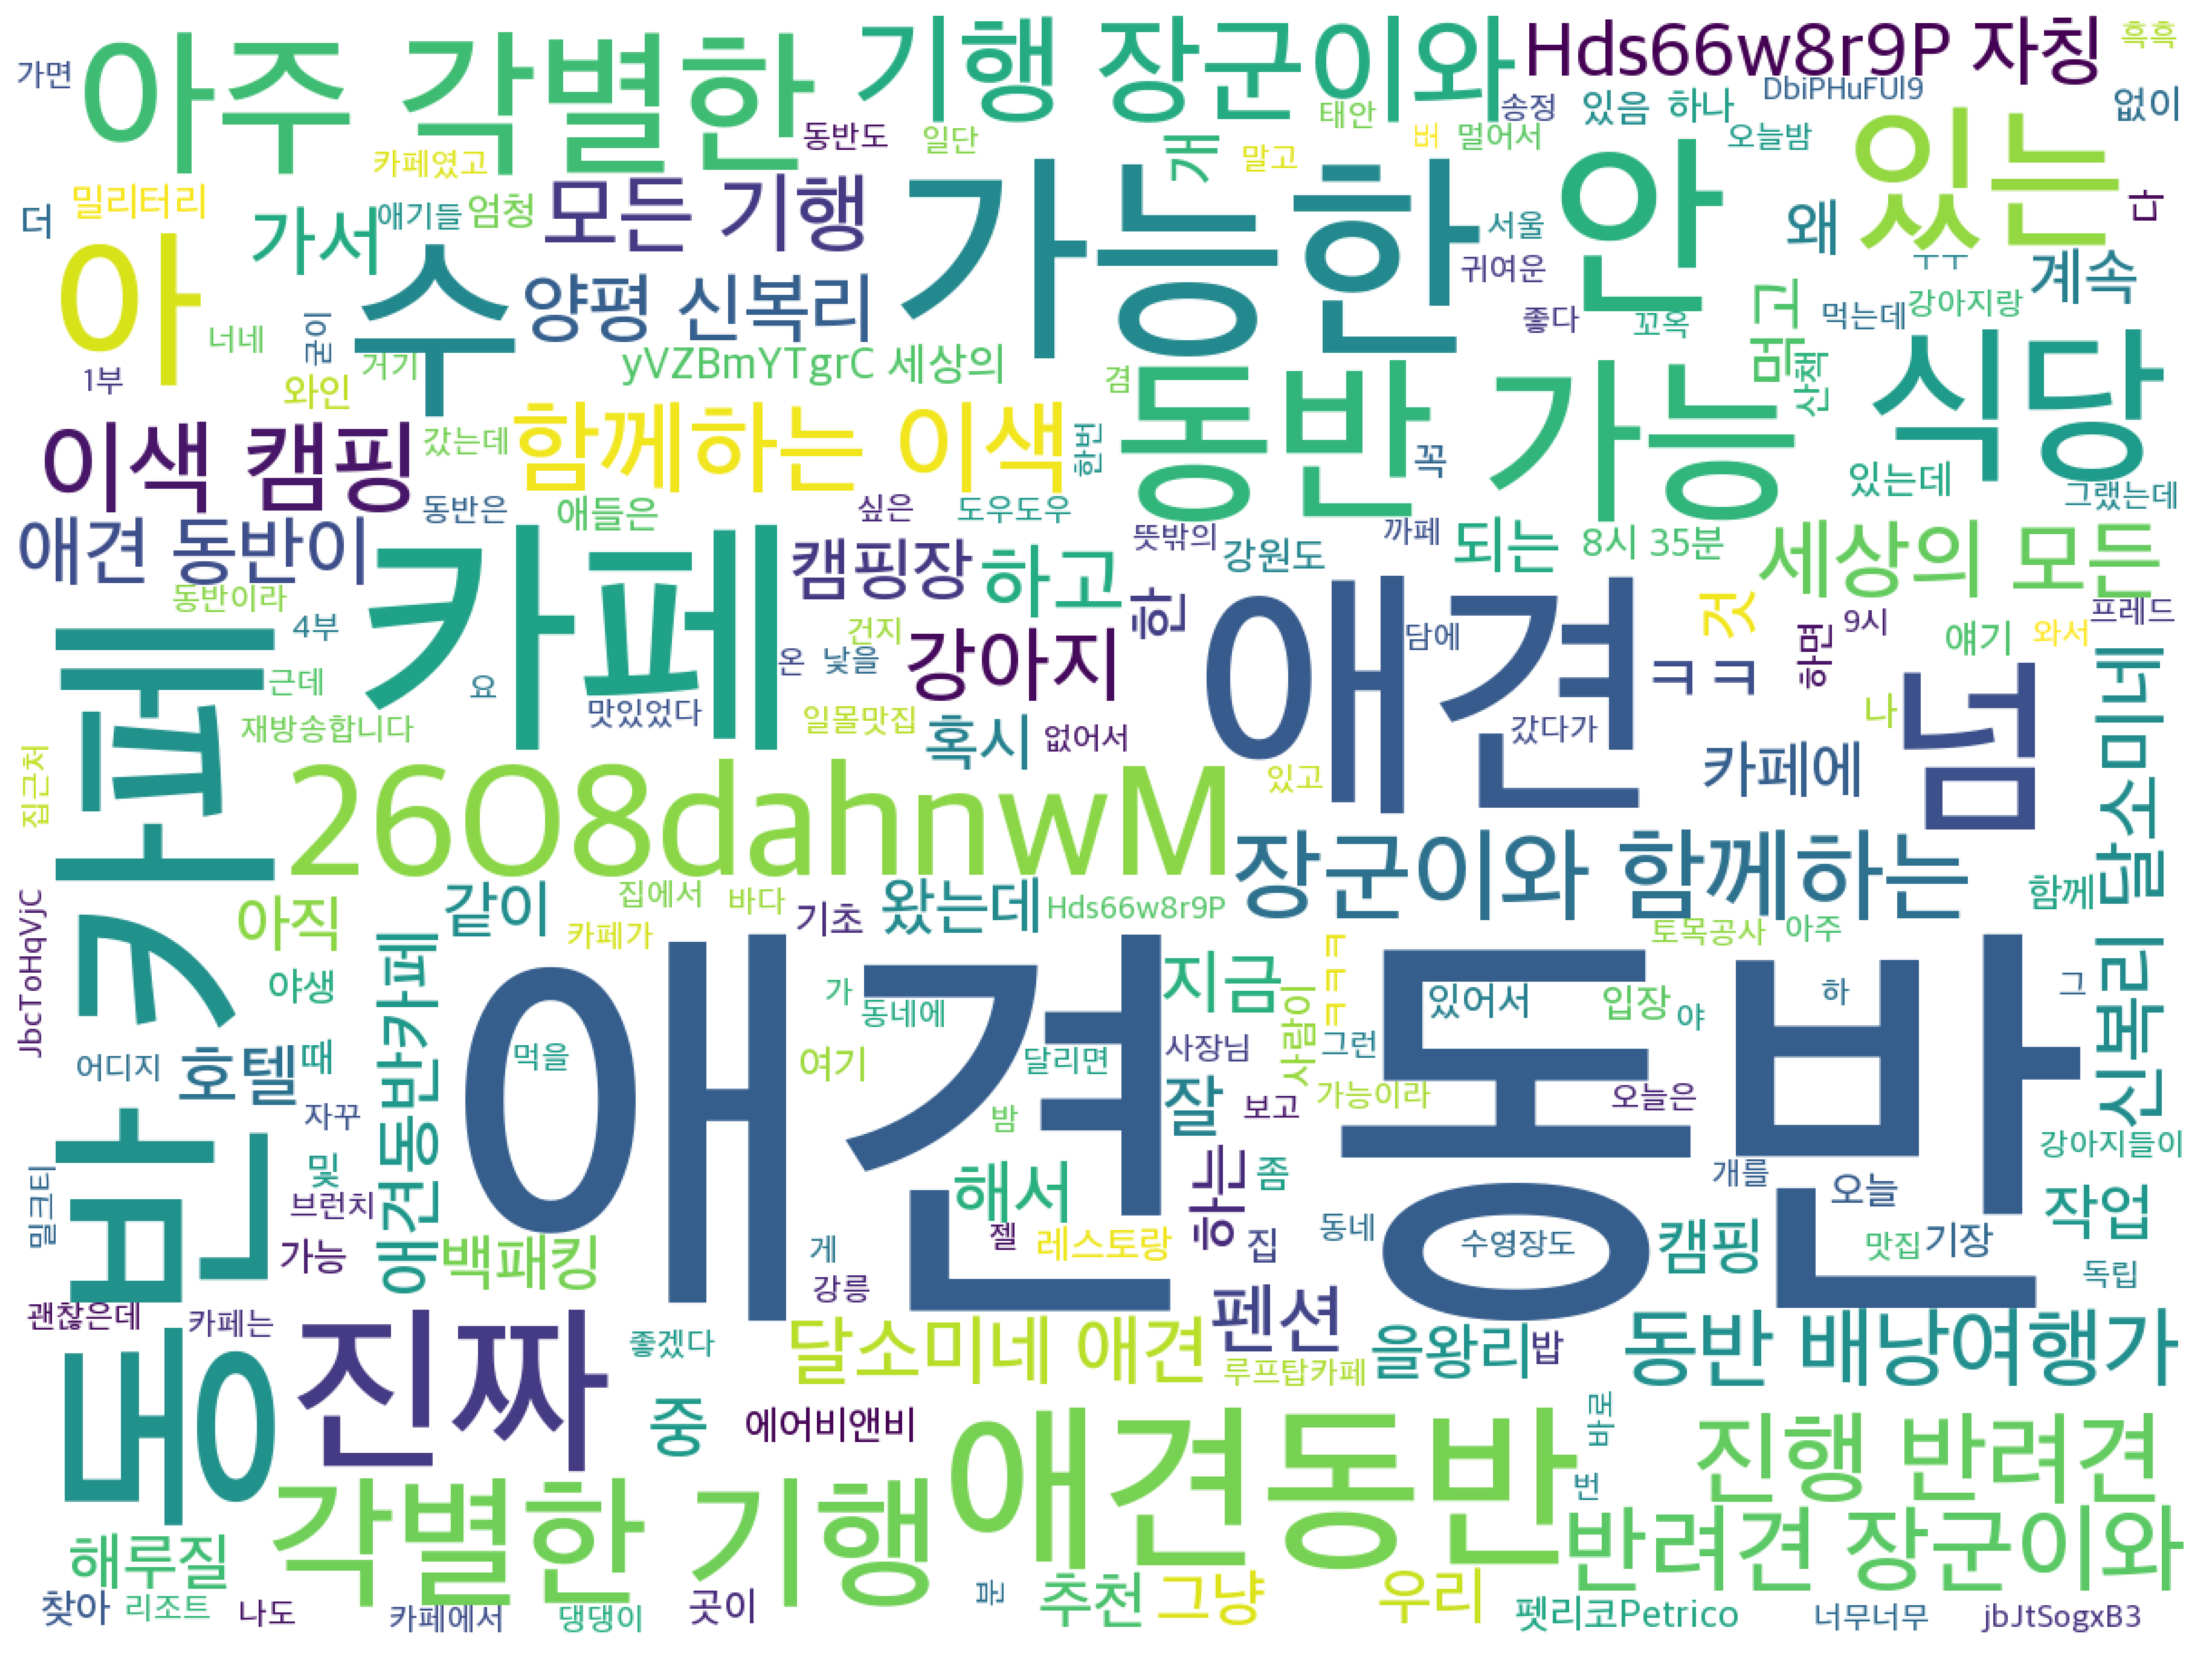

In [39]:
%time
col01 = collect01['0'].apply(preprocess)
%time
displayWordCloud(' '.join(col01))